In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\nikhi\PythonMasterClass\Data Analytics Bootcamp\Final Assignment\Account Details.csv")
df2=pd.read_csv(r"C:\Users\nikhi\PythonMasterClass\Data Analytics Bootcamp\Final Assignment\Income.csv")
df3=pd.read_csv(r"C:\Users\nikhi\PythonMasterClass\Data Analytics Bootcamp\Final Assignment\Payments.csv")
df1.head()

,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
0,3,CASH OUT FLOW,TRANSACTIONS,INVESTMENTS (INVEST),NON-OPERATIONAL,REVENUE
1,4,CASH IN FLOW,TRANSACTIONS,INVESTMENTS (REDEEM),NON-OPERATIONAL,REVENUE
2,6,CASH OUT FLOW,TRANSACTIONS,MUTUAL - EXPENSE,NON-OPERATIONAL,REVENUE
3,5,CASH IN FLOW,TRANSACTIONS,MUTUAL - REVENUE,NON-OPERATIONAL,REVENUE
4,2,CASH OUT FLOW,TRANSACTIONS,TRANSFERS AMONG EXPENSE ACCOUNTS,NON-OPERATIONAL,REVENUE


In [3]:
df1.shape

(137, 6)

In [4]:
df1[df1['Account ID']==5002]

,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
9,5002,CASH IN FLOW,OPERATIONAL REVENUE,SERVICES PROVISION,OPERATIONAL,REVENUE


In [5]:
df2.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,UF,Customer,Amount Received
0,2017-01-02,2017-01-30,2017-01-31,5003,RJ,Customer 1,787.13
1,2017-01-02,2017-02-01,2017-02-02,5003,RJ,Customer 1,655.13
2,2017-01-02,2017-02-06,2017-02-07,5003,RJ,Customer 1,354.72
3,2017-01-03,2017-01-03,2017-01-04,5003,SP,Customer 2,2597.01
4,2017-01-03,2017-02-07,2017-02-08,5003,SP,Customer 3,785.65


In [6]:
df2.shape

(14671, 7)

In [7]:
df3.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,810.52
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,969.39
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,950.57
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,2348.31
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,836.49


In [8]:
df3.shape

(20052, 7)

# Data Wrangling

In [9]:
df1.isnull().sum()

Account ID        0
Category          0
Sub Category      0
Groups            0
Cash Flow Type    0
Type              0
dtype: int64

In [10]:
df2.isnull().sum()

Issue Date          0
Due Date            0
Settlement Date     0
Chart Account ID    0
UF                  0
Customer            0
 Amount Received    0
dtype: int64

In [11]:
df3.isnull().sum()

Issue Date          0
Due Date            0
Settlement Date     0
Chart Account ID    0
Provider            0
UF                  0
 Amount Paid        0
dtype: int64

No dataframe has missing values

In [12]:
df1.dtypes

Account ID         int64
Category          object
Sub Category      object
Groups            object
Cash Flow Type    object
Type              object
dtype: object

In [13]:
df2.dtypes

Issue Date           object
Due Date             object
Settlement Date      object
Chart Account ID      int64
UF                   object
Customer             object
 Amount Received    float64
dtype: object

In [14]:
df3.dtypes

Issue Date           object
Due Date             object
Settlement Date      object
Chart Account ID      int64
Provider             object
UF                   object
 Amount Paid        float64
dtype: object

It is seen that the 3 date columns of 'df2' and 'df3' are of object datatype. However, we need to convert each of these columns to a 'datetime' type to be able to do computations

In [15]:
df2['Issue Date']=pd.to_datetime(df2['Issue Date'])
df2['Due Date']=pd.to_datetime(df2['Due Date'])
df2['Settlement Date']=pd.to_datetime(df2['Settlement Date'])
df3['Issue Date']=pd.to_datetime(df3['Issue Date'])
df3['Due Date']=pd.to_datetime(df3['Due Date'])
df3['Settlement Date']=pd.to_datetime(df3['Settlement Date'])

In [16]:
df2.dtypes

Issue Date          datetime64[ns]
Due Date            datetime64[ns]
Settlement Date     datetime64[ns]
Chart Account ID             int64
UF                          object
Customer                    object
 Amount Received           float64
dtype: object

In [17]:
df3.dtypes

Issue Date          datetime64[ns]
Due Date            datetime64[ns]
Settlement Date     datetime64[ns]
Chart Account ID             int64
Provider                    object
UF                          object
 Amount Paid               float64
dtype: object

# Find the total number of accounts

In [18]:
df1['Account ID'].count()

137

A total of 137 accounts

# Find the distribution of 'In Flow' and 'Out Flow' accounts

In [19]:
df1['Category'].value_counts()

CASH OUT FLOW    114
CASH IN FLOW      23
Name: Category, dtype: int64

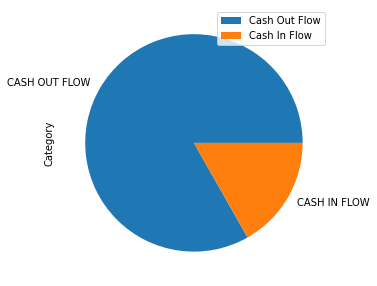

In [20]:
df1['Category'].value_counts().plot(kind='pie',figsize=(5,5))
labels=['Cash Out Flow','Cash In Flow']
plt.legend(labels)
plt.show()

A high imbalance in the dataset is observed with the 'Cash Out Flow' accounts being dominant

# Find the distribution of the account types

In [21]:
df1['Type'].value_counts()

FIXED       59
VARIABLE    52
REVENUE     26
Name: Type, dtype: int64

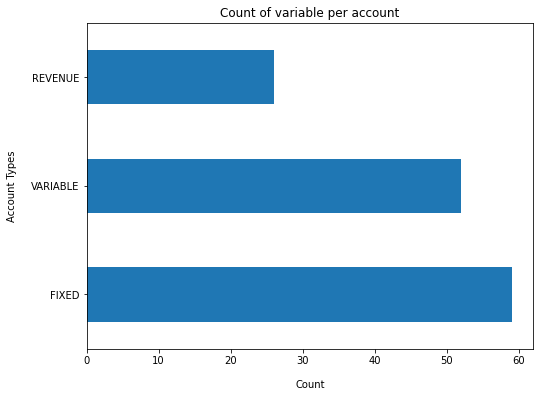

In [22]:
df1['Type'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Account Types",labelpad=14)
plt.title("Count of variable per account")
plt.show()

Most of the accounts seem to be of the 'fixed' type. 

# Find the distribution of the various types of cash flow

In [23]:
df1['Cash Flow Type'].value_counts()

OPERATIONAL        110
NON-OPERATIONAL     27
Name: Cash Flow Type, dtype: int64

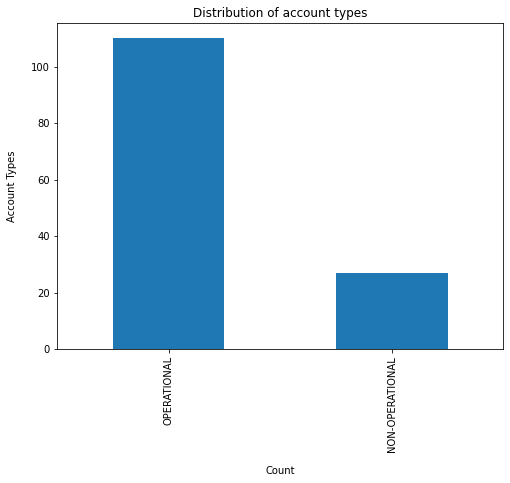

In [24]:
df1['Cash Flow Type'].value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Account Types",labelpad=14)
plt.title("Distribution of account types")
plt.show()

Most accounts seem to deal with operational expenses

# Delving deep into our cash-outflow accounts

# Fidning out the number of providers to whom we make payments to

In [25]:
df3['Provider'].unique().shape[0]

1156

A total of 1156 providers

# Insight 1: Account incurring the most expense

In [26]:
df3.groupby(['Chart Account ID'])[' Amount Paid'].sum().sort_values(ascending=False)

Chart Account ID
6111    11258662.65
6        9674874.13
6903     4291075.79
6109     3955626.56
6106     3290435.43
           ...     
6705        1922.79
6119        1285.85
6102         881.21
6201         819.84
6804         137.96
Name:  Amount Paid, Length: 105, dtype: float64

In [27]:
df1[df1['Account ID']==6111]

,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
32,6111,CASH OUT FLOW,DIRECT EXPENSES,PURCHASE OF MATERIAL FOR RESALE,OPERATIONAL,VARIABLE


We see that the most amount of money has been paid to account 6111.

# Insight 2: Identify the account to which the highest amount has been paid to in a single transaction

In [28]:
df3.groupby(['Chart Account ID'])[' Amount Paid'].max().sort_values(ascending=False)

Chart Account ID
6911    638443.67
6903    310279.57
6910    276974.19
6       206200.13
6107    196846.86
          ...    
6119       997.74
6201       667.00
6102       471.64
6317       281.50
6804       137.96
Name:  Amount Paid, Length: 105, dtype: float64

In [29]:
df1[df1['Account ID']==6911]

,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
118,6911,CASH OUT FLOW,FINANCING EXPENSES,LOANS - ASSETS DISCOUNT,OPERATIONAL,VARIABLE


The highest amount over a single transaction has been paid to account 6911.

# Insight 3: Find out the number of delayed payements (expenses) and the account which has the highest number of delayed payments

In [30]:
df3[df3['Settlement Date']>df3['Due Date']].shape[0]

2460

A total of 2460 payemnts have been settled beyond the due date

In [31]:
df3[df3['Settlement Date']>df3['Due Date']].groupby(['Chart Account ID']).size().sort_values(ascending=False).head()

Chart Account ID
6401    302
6105    206
6507    186
6111    179
6110    169
dtype: int64

Account 6401 has the highest number of defaulted payments

In [32]:
df1[df1['Account ID']==6401]

,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
85,6401,CASH OUT FLOW,ALLOCATION OF PROFITS/DIVIDEND,PRO-LABORE AND WITHDRAWALS,OPERATIONAL,FIXED


# Merging the tables which hold Account Details and Payments

In [33]:
df_merged_payments=pd.merge(df3,df1,left_on='Chart Account ID',right_on='Account ID',how='inner')

In [34]:
df_merged_payments

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,810.52,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,969.39,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,950.57,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,2348.31,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,836.49,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,2018-11-05,2018-11-05,2018-11-05,6324,Provider 986,SP,3714.39,6324,CASH OUT FLOW,PERSONNEL EXPENSES,PAYMENT - RESALE BONUS,OPERATIONAL,FIXED
20048,2019-01-04,2019-01-04,2019-01-04,6324,Provider 994,SP,1254.52,6324,CASH OUT FLOW,PERSONNEL EXPENSES,PAYMENT - RESALE BONUS,OPERATIONAL,FIXED
20049,2019-01-04,2019-01-08,2019-01-08,6324,Provider 986,SP,2655.58,6324,CASH OUT FLOW,PERSONNEL EXPENSES,PAYMENT - RESALE BONUS,OPERATIONAL,FIXED
20050,2018-11-27,2018-11-29,2018-11-29,6322,Provider 994,SP,1397.65,6322,CASH OUT FLOW,PERSONNEL EXPENSES,PAYMENT - 13th RESALE SALARY,OPERATIONAL,FIXED


# Insight 4: Identify the distribution of money spent on operational and nonoperational accounts

In [35]:
df_merged_payments.groupby(['Cash Flow Type'])[' Amount Paid'].sum().sort_values(ascending=False)

Cash Flow Type
OPERATIONAL        54812436.29
NON-OPERATIONAL    16697011.11
Name:  Amount Paid, dtype: float64

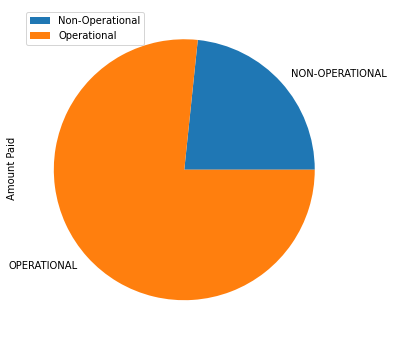

In [36]:
df_merged_payments.groupby(['Cash Flow Type'])[' Amount Paid'].sum().plot(kind='pie',figsize=(8,6))
labels=['Non-Operational','Operational']
plt.legend(labels)
plt.show()

It is evident from the plot above that a significantly more amount of money has been paid to operational accounts

# Insight 5: Identify the distribution of money spent across the various sub-categories

In [37]:
df_merged_payments.groupby(['Sub Category'])[' Amount Paid'].sum().sort_values(ascending=False)

Sub Category
DIRECT EXPENSES                   28292014.94
TRANSACTIONS                       9674874.13
FINANCING EXPENSES                 7800611.33
TAXS / FEES                        6287980.28
PERSONNEL EXPENSES                 5261060.76
ALLOCATION OF PROFITS/DIVIDEND     3707555.05
TRANSPORT                          3248919.99
FIXED COST                         1868095.59
MARKETING / ADVERTISING            1700192.46
SERVICE PROVIDER                   1503141.47
VARIABLE EXPENSES                  1253397.13
ASSETS INVESTMENTS                  911604.27
Name:  Amount Paid, dtype: float64

<AxesSubplot:ylabel='Sub Category'>

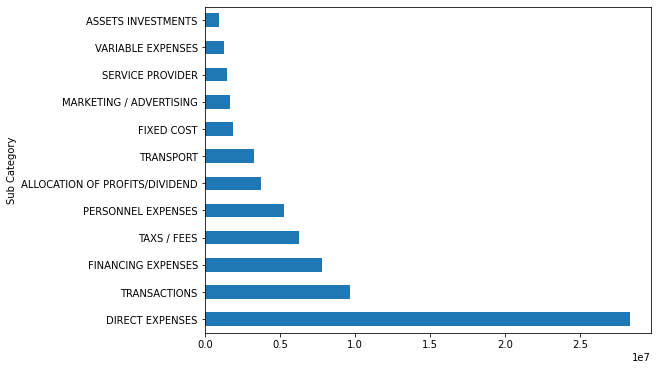

In [38]:
df_merged_payments.groupby(['Sub Category'])[' Amount Paid'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(8,6))


The highest proportion of money has been spent towards accounts pertaining to 'direct expenses' and the lowest towards 'assets investments'

# Insight 6: Expenditure By Year

In [39]:
df3['Year']=df3['Settlement Date'].dt.year

In [40]:
df3.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid,Year
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,810.52,2017
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,969.39,2017
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,950.57,2017
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,2348.31,2017
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,836.49,2017


In [41]:
df3.groupby(['Year'])[' Amount Paid'].sum().sort_values(ascending=False)

Year
2018    31188311.34
2019    25095267.05
2017    15225869.01
Name:  Amount Paid, dtype: float64

<AxesSubplot:ylabel='Year'>

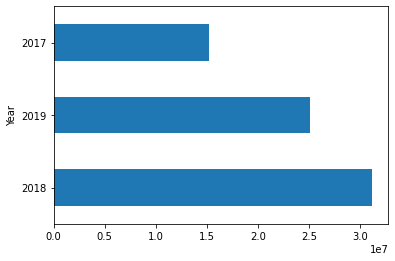

In [42]:
df3.groupby(['Year'])[' Amount Paid'].sum().sort_values(ascending=False).plot(kind='barh')

As per the above graphic, we see 2018 has been the year with the most money being spent, whereas, 2017 is the year with the least money being spent

# How many distinct customers are there?

In [43]:
df2['Customer'].value_counts().size

2197

A total of 2197 distinct customers

# Insight 7: Top 5 revenue generating customers

In [44]:
df2.groupby(['Customer'])[' Amount Received'].sum().sort_values(ascending=False).head()

Customer
Customer 9       8462117.24
Customer 26      7615036.50
Customer 2112    2395395.79
Customer 1828    1566669.13
Customer 741     1536493.78
Name:  Amount Received, dtype: float64

Highest income was received through customer 9

# Insight 8: Which year yielded the highest/lowest income?

In [45]:
df2['Year']=df2['Settlement Date'].dt.year

In [46]:
df2.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,UF,Customer,Amount Received,Year
0,2017-01-02,2017-01-30,2017-01-31,5003,RJ,Customer 1,787.13,2017
1,2017-01-02,2017-02-01,2017-02-02,5003,RJ,Customer 1,655.13,2017
2,2017-01-02,2017-02-06,2017-02-07,5003,RJ,Customer 1,354.72,2017
3,2017-01-03,2017-01-03,2017-01-04,5003,SP,Customer 2,2597.01,2017
4,2017-01-03,2017-02-07,2017-02-08,5003,SP,Customer 3,785.65,2017


In [47]:
df2.groupby(['Year'])[' Amount Received'].sum().sort_values(ascending=False)

Year
2018    27676922.34
2019    18419417.95
2017    14736609.20
Name:  Amount Received, dtype: float64

<AxesSubplot:ylabel='Year'>

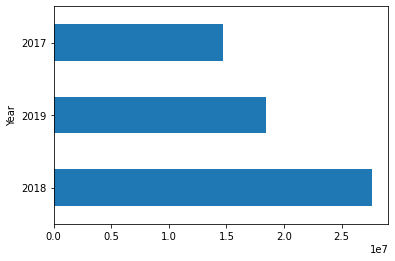

In [48]:
df2.groupby(['Year'])[' Amount Received'].sum().sort_values(ascending=False).plot(kind='barh')

As per the above graphic, we see 2018 has been the year with the hghest income, while 2017 has been the year with the lowest income.

In fact 2018 has been the year where the most money has been spent and earned

# Insight 9: Find out the number of delayed income payments received and who were the customers who made late payments the most?

In [49]:
df2[df2['Settlement Date']>df2['Due Date']].shape[0]

8458

In [50]:
df2[df2['Settlement Date']>df2['Due Date']].groupby(['Customer']).size().sort_values(ascending=False).head()

Customer
Customer 319     279
Customer 822     206
Customer 1718    197
Customer 56      185
Customer 26      169
dtype: int64

There were a total of 8458 payments which were made settled beyond the due date and 'Customer 319' seems to have defaulted the most

# Merging the tables which hold information pertaining to account details and income

In [51]:
df_merged_payments_ic=pd.merge(df2,df1,left_on='Chart Account ID',right_on='Account ID',how='inner')

In [52]:
df_merged_payments_ic.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,UF,Customer,Amount Received,Year,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
0,2017-01-02,2017-01-30,2017-01-31,5003,RJ,Customer 1,787.13,2017,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE
1,2017-01-02,2017-02-01,2017-02-02,5003,RJ,Customer 1,655.13,2017,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE
2,2017-01-02,2017-02-06,2017-02-07,5003,RJ,Customer 1,354.72,2017,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE
3,2017-01-03,2017-01-03,2017-01-04,5003,SP,Customer 2,2597.01,2017,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE
4,2017-01-03,2017-02-07,2017-02-08,5003,SP,Customer 3,785.65,2017,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE


# Insight 10: Was greater income obtained through 'Operational' or 'Non-Operaional' accounts?

In [53]:
df_merged_payments_ic.groupby(['Cash Flow Type'])[' Amount Received'].sum()

Cash Flow Type
NON-OPERATIONAL     3092672.97
OPERATIONAL        57740276.52
Name:  Amount Received, dtype: float64

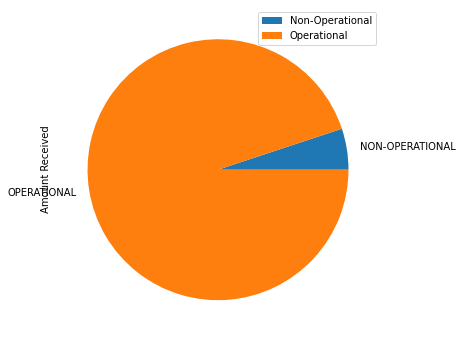

In [54]:
df_merged_payments_ic.groupby(['Cash Flow Type'])[' Amount Received'].sum().plot(kind='pie',figsize=(8,6))
labels=['Non-Operational','Operational']
plt.legend(labels)
plt.show()

A significant proportion of the income earned was through 'Operational' accounts

# Insight 11: Identify the top 5 customers who had the most number of income related trasnsactions over the last 3 years

In [55]:
df2.groupby(['Customer'])['Customer'].count().sort_values(ascending=False).head()

Customer
Customer 26     336
Customer 9      311
Customer 319    302
Customer 198    272
Customer 56     257
Name: Customer, dtype: int64

'Customer 26' had the highest number of 'in-flow' transactions

# Insight 12: Identify the top 5 accounts who produced the highest income in years 2017, 2018, 2019

In [56]:
df2_2017=df2[df2['Year']==2017]

In [57]:
df2_2017.groupby(['Chart Account ID'])[' Amount Received'].sum().sort_values(ascending=False).head()

Chart Account ID
5002    10069172.55
5003     4667301.49
5101         135.16
Name:  Amount Received, dtype: float64

<AxesSubplot:ylabel='Chart Account ID'>

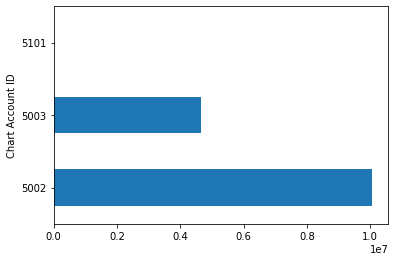

In [58]:
df2_2017.groupby(['Chart Account ID'])[' Amount Received'].sum().sort_values(ascending=False).head().plot(kind='barh')

We see in year 2017, account 5002 has generated the highest income

In [59]:
df2_2018=df2[df2['Year']==2018]

In [60]:
df2_2018.groupby(['Chart Account ID'])[' Amount Received'].sum().sort_values(ascending=False).head()

Chart Account ID
5002    17613278.51
5003     6970260.39
5105     1975636.53
5001      359105.31
5006      299804.94
Name:  Amount Received, dtype: float64

<AxesSubplot:ylabel='Chart Account ID'>

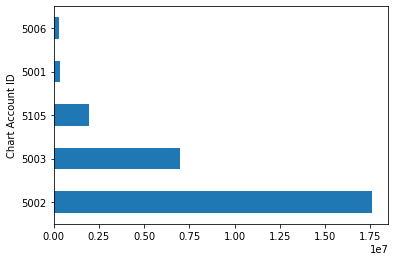

In [61]:
df2_2018.groupby(['Chart Account ID'])[' Amount Received'].sum().sort_values(ascending=False).head().plot(kind='barh')

We see in year 2018, account 5002 has generated the highest income

In [62]:
df2_2019=df2[df2['Year']==2019]

In [63]:
df2_2019.groupby(['Chart Account ID'])[' Amount Received'].sum().sort_values(ascending=False).head()

Chart Account ID
5002    10551215.16
5003     5023967.92
5111      960160.22
5001      844233.79
5006      284874.04
Name:  Amount Received, dtype: float64

<AxesSubplot:ylabel='Chart Account ID'>

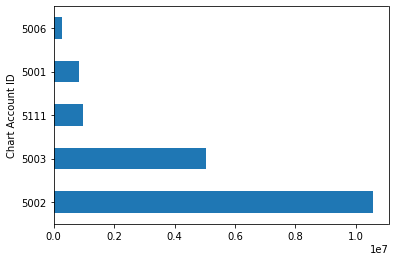

In [64]:
df2_2019.groupby(['Chart Account ID'])[' Amount Received'].sum().sort_values(ascending=False).head().plot(kind='barh')

We see in year 2019, account 5002 has generated the highest income

Conclusion: We see that account 5002 seems to be a significant income generator followed distantly by account 5003

# Insight 13: Identify the top 5 accounts to which the highest payemnts were made in 2017,2018, and 2019. Pull up details of the accounts which cost the most money each year

In [65]:
df3_2017=df3[df3['Year']==2017]

In [66]:
df3_2017.groupby(['Chart Account ID'])[' Amount Paid'].sum().sort_values(ascending=False).head()

Chart Account ID
6111    2389205.50
6106    1443883.37
6903    1119801.71
6402    1098949.83
6110     967031.91
Name:  Amount Paid, dtype: float64

<AxesSubplot:ylabel='Chart Account ID'>

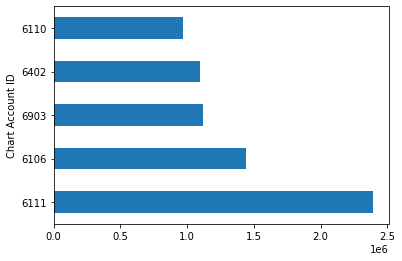

In [67]:
df3_2017.groupby(['Chart Account ID'])[' Amount Paid'].sum().sort_values(ascending=False).head().plot(kind='barh')

In 2017, Account 6111 costed the company the most

In [68]:
df3_2018=df3[df3['Year']==2018]

In [69]:
df3_2018.groupby(['Chart Account ID'])[' Amount Paid'].sum().sort_values(ascending=False).head()

Chart Account ID
6111    5165295.79
6       4230997.23
6903    2759273.92
6109    2108650.72
6106    1686359.53
Name:  Amount Paid, dtype: float64

<AxesSubplot:ylabel='Chart Account ID'>

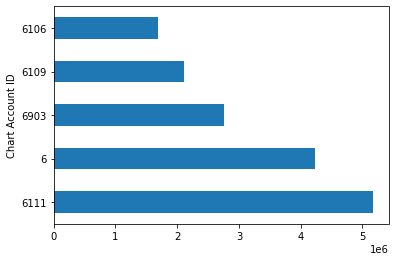

In [70]:
df3_2018.groupby(['Chart Account ID'])[' Amount Paid'].sum().sort_values(ascending=False).head().plot(kind='barh')

In 2018, account 6111 cost the company the most followed closely by account 6

In [71]:
df3_2019=df3[df3['Year']==2019]

In [72]:
df3_2019.groupby(['Chart Account ID'])[' Amount Paid'].sum().sort_values(ascending=False).head()

Chart Account ID
6       5443876.90
6111    3704161.36
6911    1545736.08
6109    1421863.44
6301     923265.84
Name:  Amount Paid, dtype: float64

<AxesSubplot:ylabel='Chart Account ID'>

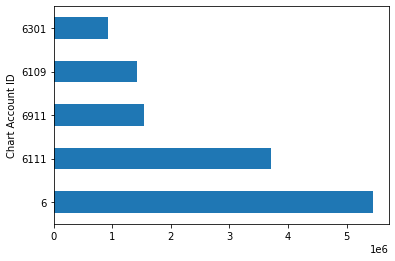

In [73]:
df3_2019.groupby(['Chart Account ID'])[' Amount Paid'].sum().sort_values(ascending=False).head().plot(kind='barh')

In [74]:
# df1[df1['Account ID']==6 & df1['Account ID']==6111]
df1[df1['Account ID']==6]

,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
2,6,CASH OUT FLOW,TRANSACTIONS,MUTUAL - EXPENSE,NON-OPERATIONAL,REVENUE


In [75]:
df1[df1['Account ID']==6111]

,Account ID,Category,Sub Category,Groups,Cash Flow Type,Type
32,6111,CASH OUT FLOW,DIRECT EXPENSES,PURCHASE OF MATERIAL FOR RESALE,OPERATIONAL,VARIABLE


In 2019, account 6 cost the company the most followed by account 6111

Conclusion: In years 2017 and 2018, account 6111 was the account which cost the company the most money. In year 2019, account 6 was the account which cost the company the most money. Account 6 was related to 'Transactions' and account 6111 dealt with 'Direct Expenses'. 

# Insight 14: Pull out the monthly net income for the years 2017, 2018, and 2019 (Income-Payments)

In [76]:
df_income=df2

In [77]:
df_income['Month']=df_income['Settlement Date'].dt.month

In [78]:
df_income.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,UF,Customer,Amount Received,Year,Month
0,2017-01-02,2017-01-30,2017-01-31,5003,RJ,Customer 1,787.13,2017,1
1,2017-01-02,2017-02-01,2017-02-02,5003,RJ,Customer 1,655.13,2017,2
2,2017-01-02,2017-02-06,2017-02-07,5003,RJ,Customer 1,354.72,2017,2
3,2017-01-03,2017-01-03,2017-01-04,5003,SP,Customer 2,2597.01,2017,1
4,2017-01-03,2017-02-07,2017-02-08,5003,SP,Customer 3,785.65,2017,2


In [79]:
df_payments=df3

In [80]:
df_payments['Month']=df_payments['Settlement Date'].dt.month

In [81]:
df_payments.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid,Year,Month
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,810.52,2017,8
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,969.39,2017,8
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,950.57,2017,7
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,2348.31,2017,7
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,836.49,2017,7


In [82]:
df_income_2017=df_income[df_income['Year']==2017]

In [83]:
df_income_2017.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,UF,Customer,Amount Received,Year,Month
0,2017-01-02,2017-01-30,2017-01-31,5003,RJ,Customer 1,787.13,2017,1
1,2017-01-02,2017-02-01,2017-02-02,5003,RJ,Customer 1,655.13,2017,2
2,2017-01-02,2017-02-06,2017-02-07,5003,RJ,Customer 1,354.72,2017,2
3,2017-01-03,2017-01-03,2017-01-04,5003,SP,Customer 2,2597.01,2017,1
4,2017-01-03,2017-02-07,2017-02-08,5003,SP,Customer 3,785.65,2017,2


In [84]:
income_2017=df_income_2017.groupby(['Month'])[' Amount Received'].sum()

In [85]:
income_2017

Month
1      160911.22
2      532765.87
3     1091867.28
4     1448257.23
5      702612.71
6      563695.18
7      801956.94
8     2005979.65
9     1242056.03
10    1594685.00
11    1802386.73
12    2789435.36
Name:  Amount Received, dtype: float64

In [86]:
df_payment_2017=df_payments[df_payments['Year']==2017]

In [87]:
df_payment_2017.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid,Year,Month
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,810.52,2017,8
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,969.39,2017,8
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,950.57,2017,7
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,2348.31,2017,7
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,836.49,2017,7


In [88]:
payment_2017=df_payment_2017.groupby(['Month'])[' Amount Paid'].sum()

In [89]:
payment_2017

Month
1      275061.14
2      874348.31
3     1255751.54
4     1170092.33
5      841673.18
6     1905008.55
7     1006296.31
8     1570132.16
9     1363689.01
10    1483270.20
11    1527629.27
12    1952917.01
Name:  Amount Paid, dtype: float64

In [90]:
net_income_2017=income_2017-payment_2017

In [91]:
net_income_2017.sort_values(ascending=False)

Month
12     836518.35
8      435847.49
4      278164.90
11     274757.46
10     111414.80
1     -114149.92
9     -121632.98
5     -139060.47
3     -163884.26
7     -204339.37
2     -341582.44
6    -1341313.37
dtype: float64

<AxesSubplot:xlabel='Month'>

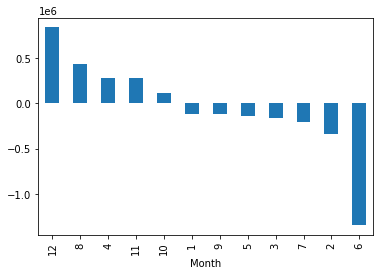

In [92]:
net_income_2017.sort_values(ascending=False).plot(kind='bar')

For the year 2017, the month of march has generated the highest net income and in the month of september, the company sffered its heaviest loss. In fact the months November, August, October, June, and September have seen the company incur losses

In [93]:
df_income_2018=df_income[df_income['Year']==2018]

In [94]:
income_2018=df_income_2018.groupby(['Month'])[' Amount Received'].sum()

In [95]:
df_payment_2018=df_payments[df_payments['Year']==2018]

In [96]:
payment_2018=df_payment_2018.groupby(['Month'])[' Amount Paid'].sum()

In [97]:
net_income_2018=income_2018-payment_2018

In [98]:
net_income_2018.sort_values(ascending=False)

Month
5      482407.23
2      278821.40
1      233527.47
6       12849.17
3     -114086.26
7     -163997.84
10    -387835.24
4     -419882.75
9     -516134.37
12    -737382.11
11    -774955.08
8    -1404720.62
dtype: float64

<AxesSubplot:xlabel='Month'>

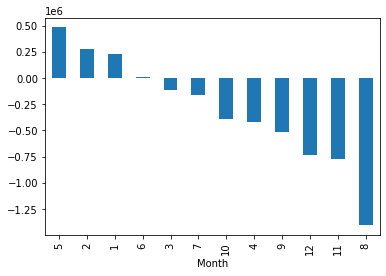

In [99]:
net_income_2018.sort_values(ascending=False).plot(kind='bar')

For the year 2018, we see many more months where the compnay has incurred losses than obtained profits. The company has obtained its highest profits in the month of April and suffered its highest loss in the month of September.

In [100]:
df_income_2019=df_income[df_income['Year']==2019]

In [101]:
income_2019=df_income_2019.groupby(['Month'])[' Amount Received'].sum()

In [102]:
income_2019

Month
1    1856136.48
2    1661212.26
3    2461750.74
4    2664989.77
5    2171940.49
6    1913458.90
7    3818244.61
8    1821674.71
9      50009.99
Name:  Amount Received, dtype: float64

In [103]:
df_payment_2019=df_payments[df_payments['Year']==2019]

In [104]:
payment_2019=df_payment_2019.groupby(['Month'])[' Amount Paid'].sum()

In [105]:
payment_2019

Month
1    2720119.17
2    2539223.27
3    3792539.13
4    4257557.94
5    3355917.65
6    2501793.31
7    3378040.46
8    2509024.78
9      41051.34
Name:  Amount Paid, dtype: float64

In [106]:
net_income_2019=income_2019-payment_2019

In [107]:
net_income_2019.sort_values(ascending=False)

Month
7     440204.15
9       8958.65
6    -588334.41
8    -687350.07
1    -863982.69
2    -878011.01
5   -1183977.16
3   -1330788.39
4   -1592568.17
dtype: float64

In [108]:
net_income_2019

Month
1    -863982.69
2    -878011.01
3   -1330788.39
4   -1592568.17
5   -1183977.16
6    -588334.41
7     440204.15
8    -687350.07
9       8958.65
dtype: float64

In [109]:
net_income_2019.sort_values(ascending=False)

Month
7     440204.15
9       8958.65
6    -588334.41
8    -687350.07
1    -863982.69
2    -878011.01
5   -1183977.16
3   -1330788.39
4   -1592568.17
dtype: float64

<AxesSubplot:xlabel='Month'>

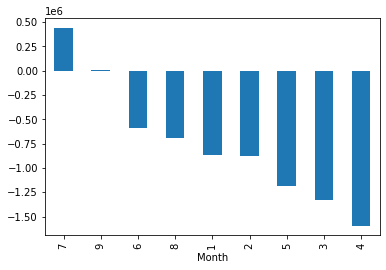

In [110]:
net_income_2019.sort_values(ascending=False).plot(kind='bar')

For the year 2019, apart from July and September, all other months have shown losses for the company. The highest profit was made in July and the heaviest loss was incured in April

# Insight 15: Pull out the yearly net income (Income-Payments)

In [111]:
income=df_income.groupby(['Year'])[' Amount Received'].sum()

In [112]:
income

Year
2017    14736609.20
2018    27676922.34
2019    18419417.95
Name:  Amount Received, dtype: float64

In [113]:
payments=df_payments.groupby(['Year'])[' Amount Paid'].sum()

In [114]:
payments

Year
2017    15225869.01
2018    31188311.34
2019    25095267.05
Name:  Amount Paid, dtype: float64

In [115]:
yearly_net_income=income-payments

In [116]:
yearly_net_income

Year
2017    -489259.81
2018   -3511389.00
2019   -6675849.10
dtype: float64

<AxesSubplot:xlabel='Year'>

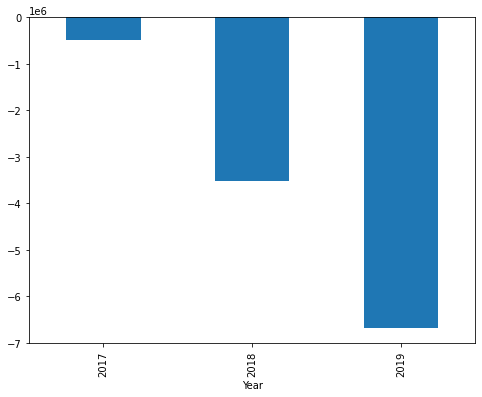

In [117]:
yearly_net_income.plot(kind='bar',figsize=(8,6))

All 3 years have shown losses, with 2019 being the year where the company suffered its heaviest loss

# Insight 16: Did the company show overall profit/loss over the last 3 years?

In [118]:
yearly_net_income.sum()

-10676497.910000002

It is seen that the company has incurred a loss of over $10 million

# Insight 17: Find the Net Profit Margin

In [119]:
net_profit_margin_2019=(net_income_2019/payment_2019)

In [131]:
net_profit_margin_2019=net_profit_margin_2019*100

In [132]:
net_profit_margin_2019

Month
1   -31.762678
2   -34.577937
3   -35.089642
4   -37.405672
5   -35.280280
6   -23.516507
7    13.031346
8   -27.395109
9    21.823039
dtype: float64

In [133]:
net_profit_margin_2018=(net_income_2018/payment_2018)

In [134]:
net_profit_margin_2018

Month
1     0.126829
2     0.165590
3    -0.065395
4    -0.180108
5     0.193255
6     0.005726
7    -0.058157
8    -0.452089
9    -0.155546
10   -0.107699
11   -0.277265
12   -0.230016
dtype: float64

In [135]:
net_profit_margin_2018=net_profit_margin_2018*100

In [136]:
net_profit_margin_2018

Month
1     12.682895
2     16.559009
3     -6.539452
4    -18.010816
5     19.325469
6      0.572617
7     -5.815688
8    -45.208940
9    -15.554580
10   -10.769906
11   -27.726518
12   -23.001560
dtype: float64

In [124]:
net_profit_margin_2017=(net_income_2017/payment_2017)

In [126]:
net_profit_margin_2017=net_profit_margin_2017*100

In [127]:
net_profit_margin_2017

Month
1    -41.499835
2    -39.067090
3    -13.050692
4     23.772902
5    -16.521908
6    -70.409835
7    -20.306084
8     27.758650
9     -8.919408
10     7.511430
11    17.985873
12    42.834301
dtype: float64

In [139]:
net_profit_margin_2017.sum()

-89.91169515457862

In [140]:
net_profit_margin_2018.sum()

-103.48747067662288

In [141]:
net_profit_margin_2019.sum()

-190.17343967795196

In [142]:
total_net_profit_margin=net_profit_margin_2017.sum()+net_profit_margin_2018.sum()+net_profit_margin_2019.sum()

In [143]:
total_net_profit_margin

-383.5726055091535

In [144]:
avg_net_profit_margin=(total_net_profit_margin/33)

In [145]:
avg_net_profit_margin

-11.623412288156167

The average net profit margin over the last 3 years is ~ -11.6%. In other words, the company loses nearly 11 cents for every dollar of revenue it generates.